In [1]:
# %% Global Variables
datasetPath = "./TM-3-2020"
sourceCodePath = './src'

In [2]:
!pip install ipywidgets

In [3]:
# %% libraries
import numpy as np
import pandas as pd
import os
import sys
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib
import torch

In [4]:
# %% Loads Source code
sys.path.append(os.path.join(os.getcwd(), sourceCodePath))

In [5]:
import chat as ch

In [6]:
# %% Loads Dataset
dataset = ch.dataset.Dataset(datasetPath)

In [7]:
# %%
df = dataset.get_dataframe()
df.head()

,conversation_id,scenario,instructions,conversation,intent,success
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,auto template 1 with theater name error,"scenario: in the conversation below, a custome...",hi....am buying a ticket tonight so we go and ...,buy,1
1,dlg-bd494e2c-36f6-4529-8e4d-d5c4d64388ae,auto template 1 with theater name error,"scenario: in the conversation below, a custome...",I am looking for tickets tonight at the AMC Mo...,buy,1
2,dlg-c9064676-75fe-4d0a-83c2-497e1f2115a6,auto template 1 with theater name error,"scenario: in the conversation below, a custome...",I need to get some tickets for a movie tonight...,buy,1
3,dlg-f7500bcf-472c-48c3-adfd-e4ec9f63bcf1,auto template 1 with theater name error,"scenario: in the conversation below, a custome...",I need help finding showtimes for tonight at m...,buy,1
4,dlg-df1f0d45-27f2-4fb0-8aaa-b6b5f5a843bb,auto template 1 with theater name error,"scenario: in the conversation below, a custome...","Hello, I am interested in buying tickets tonig...",buy,1


In [18]:
print('Rows',df.shape[0])

Rows 23757


In [8]:
# %%
categories_count = df['scenario'].value_counts()
categories_count

successful purchase with fake kb table                      2947
recommendation                                              1807
successful purchase with fake kb table - 1                  1707
auto template 13 movie name resolution                      1052
successful purchase                                         1040
screening change                                             974
tickets change                                               870
theater change                                               841
misunderstanding                                             817
deferred purchase                                            737
auto template 2 success                                      657
options unavailable                                          646
movie change                                                 628
time change                                                  609
auto template 4 no purchase as movie not playing locally     593
auto template 1 with thea

<AxesSubplot:title={'center':'Distribution of Sub categories'}, ylabel='scenario'>

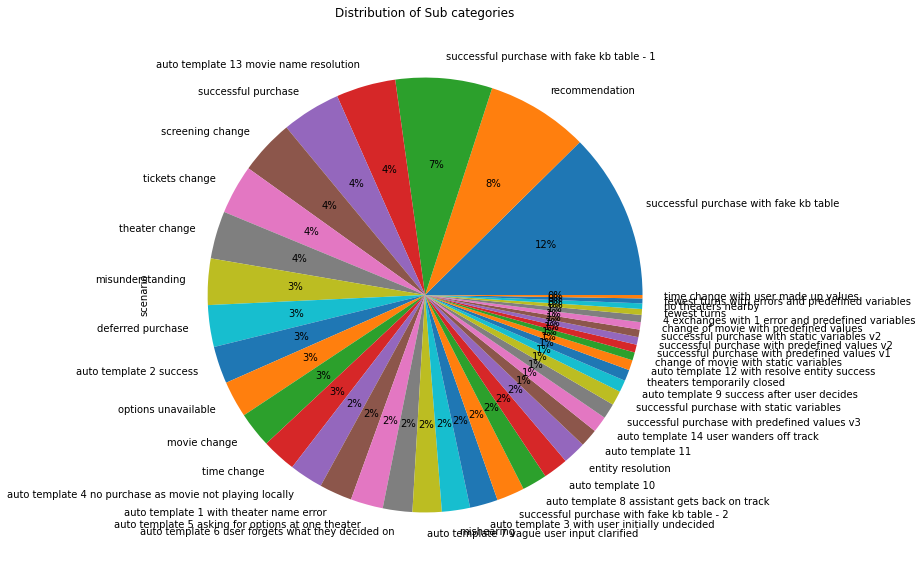

In [9]:
categories_count.plot.pie(title="Distribution of Sub categories", autopct='%.0f%%', figsize=(10, 10))

In [10]:
intent_count = df['intent'].value_counts()
intent_count

buy               16426
change             4253
recommendation     2859
                    219
Name: intent, dtype: int64

<AxesSubplot:title={'center':'Scenarios'}>

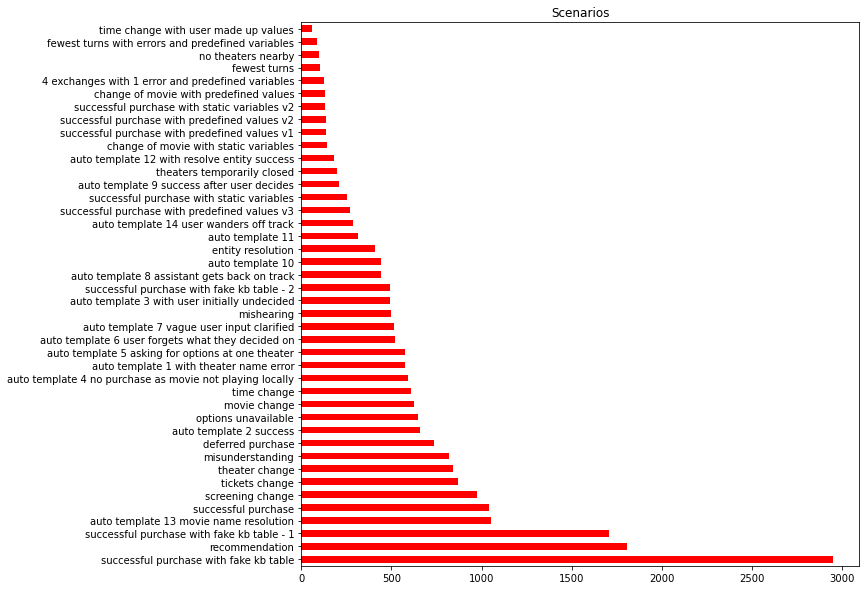

In [11]:
df['scenario'].value_counts().plot.barh(color="red", title="Scenarios", y=100, figsize=(10, 10))

In [12]:
intent_count = df['intent'].value_counts()
intent_count

buy               16426
change             4253
recommendation     2859
                    219
Name: intent, dtype: int64

<AxesSubplot:title={'center':'Distribution of Intents'}, ylabel='intent'>

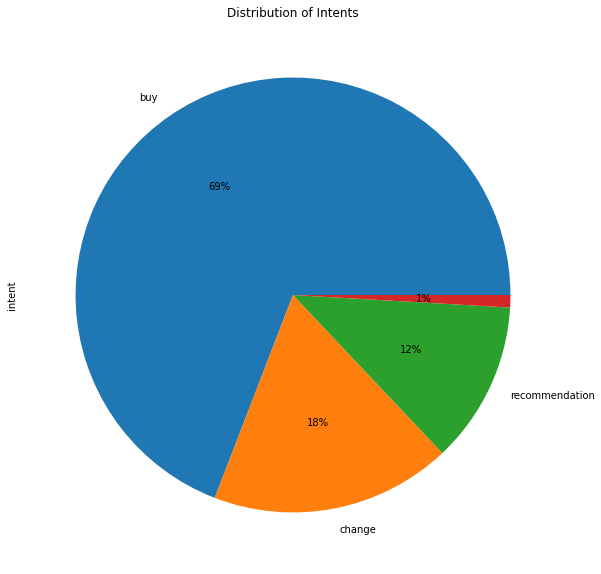

In [13]:
intent_count.plot.pie(title="Distribution of Intents", figsize=(10, 10), autopct='%.0f%%')

In [16]:
success_count = df['success'].value_counts()
success_count

1    20295
0     3243
       219
Name: success, dtype: int64

<AxesSubplot:title={'center':'Distribution of Success'}, ylabel='success'>

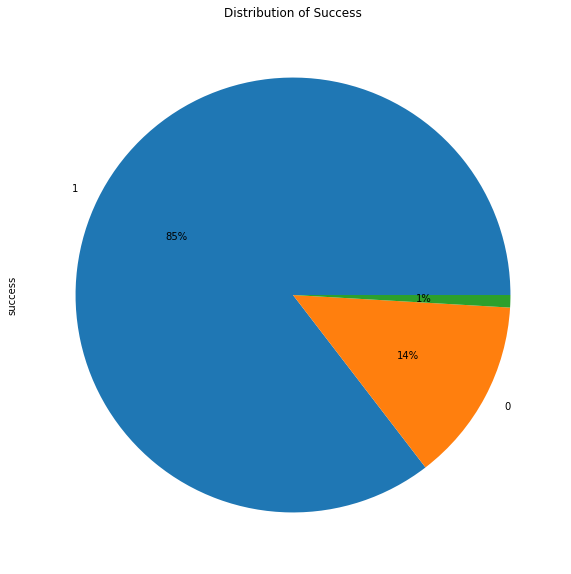

In [17]:
success_count.plot.pie(title="Distribution of Success", figsize=(10, 10), autopct='%.0f%%')

<AxesSubplot:title={'center':'Scenarios'}>

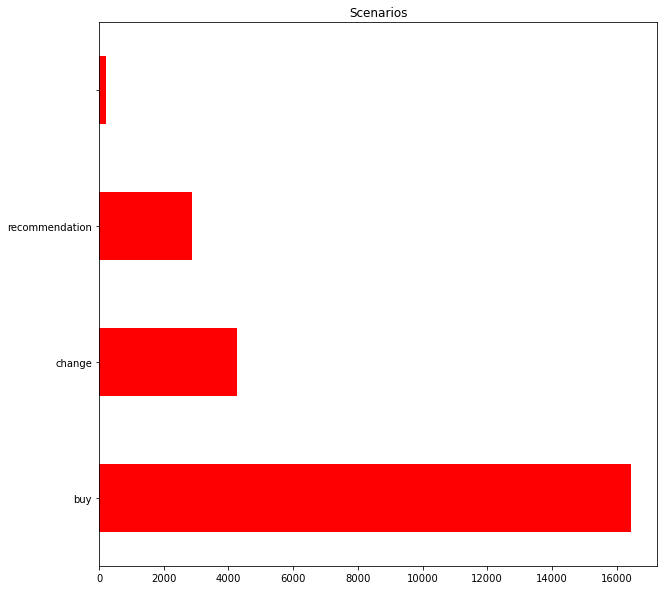

In [14]:
intent_count.plot.barh(color="red", title="Scenarios", y=100, figsize=(10, 10))

In [15]:
df.to_csv('dataset.csv')